In [1]:
import pandas as pd

## IndoBERT + PCA 300 TIs

In [3]:
# Read the PCA data
pca_df = pd.read_csv('../Data/pca_data_BBCA.csv', parse_dates=['Date'])

# Read the sentiment data
sentiment_df = pd.read_csv('../Data/IndoBERT_KNN_Sentiment_Score.csv', parse_dates=['Date'])

# Rename the sentiment column to Sentiments
sentiment_df = sentiment_df.rename(columns={'sentiment': 'Sentiments'})

# Merge the dataframes on the Date column
# Using left join to keep only dates that exist in PCA.csv
combined_df = pd.merge(pca_df, sentiment_df, on='Date', how='left')

# Ensure 'Close' is the last column
columns = [col for col in combined_df.columns if col != 'Close'] + ['Close']
combined_df = combined_df[columns]

# Sort the dataframe by Date
combined_df = combined_df.sort_values('Date')

# Save the combined data to a new CSV file
combined_df.to_csv('../Data/Final Dataset/indobert_pca.csv', index=False)

print(combined_df.head())
print(f"\nShape of combined dataframe: {combined_df.shape}")
print(f"\nColumns in combined dataframe: {combined_df.columns.tolist()}")
print(f"\nLast 5 columns: {combined_df.columns[-5:].tolist()}")

        Date       PC1       PC2       PC3       PC4       PC5       PC6  \
0 2020-01-02 -6.313092 -6.244205 -2.381115 -0.112140 -1.663952  1.763525   
1 2020-01-03 -5.966080 -8.335473 -1.617433 -1.632691 -0.882051 -0.755986   
2 2020-01-06 -6.045090 -6.674363 -2.970133 -0.031862 -0.708033 -0.639095   
3 2020-01-07 -5.916451 -6.370546 -3.665120 -0.081324 -2.084779  2.731416   
4 2020-01-08 -6.037435 -4.876338 -4.584319  1.031301 -0.753808 -0.023819   

        PC7       PC8       PC9  ...      PC39      PC40      PC41      PC42  \
0 -0.491209 -2.230282  2.265266  ... -3.277426 -1.796109 -0.086088 -0.404699   
1 -0.687610 -2.036233  0.438333  ...  0.388757  0.081314  1.209684  1.264698   
2 -0.625946 -1.799531  0.364652  ... -0.668818  0.457838  0.277562  1.078478   
3 -0.985879 -1.784162  0.649592  ...  0.141132  0.701550  0.797359  1.509670   
4  0.517230 -2.119731  1.026784  ...  0.735832 -0.312467 -1.049957  1.161467   

       PC43      PC44      PC45      PC46  Sentiments   Close 

## IndoBERT + 7 TIs

In [6]:
import pandas as pd

In [7]:
TIs = pd.read_csv('../Data/technical_indicators_BBCA.csv', sep=';', parse_dates=['Date'])
# lexicon = pd.read_csv('../Data/lexicon_average_sentiment_score_imputed.csv', parse_dates=['Date'])
indobert = pd.read_csv('../Data/IndoBERT_KNN_Sentiment_Score.csv', parse_dates=['Date'])

# Get the ADX_28, AD, EMA_20, KAMA_20, MACD_12_26, RSI_28, and the Close

combined_df = TIs[['Date', 'STOCH_k', 'STOCH_d', 'EMA_20', 'MACD_12_26', 'RSI_28', 'BBANDS_lower_20_2', 'BBANDS_middle_20_2', 'BBANDS_upper_20_2', 'Volume', 'Close']]
# combined_df = pd.merge(combined_df, lexicon[['Date', 'Lexicon Sentiment Score']], on='Date', how='left')
combined_df = pd.merge(combined_df, indobert[['Date', 'sentiment']], on='Date', how='left')
# rename sentiment column to IndoBERT Sentiment Score
combined_df = combined_df.rename(columns={'sentiment': 'IndoBERT Sentiment Score'})

In [8]:
combined_df 

,Date,STOCH_k,STOCH_d,EMA_20,MACD_12_26,RSI_28,BBANDS_lower_20_2,BBANDS_middle_20_2,BBANDS_upper_20_2,Volume,Close,IndoBERT Sentiment Score
0,2020-01-02,52.820513,61.922586,6533.078534,105.335764,63.999775,6200.752496,6501.25,6801.747504,49445000.0,6690.0,-0.333333
1,2020-01-03,62.820513,60.142450,6558.499626,113.468238,67.180328,6195.069238,6520.00,6844.930762,47755500.0,6800.0,0.666667
2,2020-01-06,60.256410,58.632479,6575.309185,113.361564,63.730031,6207.358200,6538.00,6868.641800,27300000.0,6735.0,-0.500000
3,2020-01-07,67.948718,63.675214,6590.994025,112.384978,63.878022,6224.947725,6556.75,6888.552275,45022500.0,6740.0,0.233333
4,2020-01-08,37.179487,55.128205,6599.470784,105.552781,60.791239,6253.470825,6573.75,6894.029175,53692500.0,6680.0,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
1142,2024-09-20,92.753623,94.806763,10446.551701,129.016148,60.593211,10023.121273,10390.00,10756.878727,142194600.0,10775.0,-0.500000
1143,2024-09-23,92.753623,95.169082,10494.499158,152.943314,63.106040,9982.423440,10421.25,10860.076560,72553800.0,10950.0,0.142857
1144,2024-09-24,82.753623,89.420290,10523.594477,157.980914,59.720980,9979.006438,10445.00,10910.993562,105191100.0,10800.0,-0.142857
1145,2024-09-25,82.156863,85.888036,10554.680717,164.116003,60.454258,9994.048865,10477.50,10960.951135,158369100.0,10850.0,-0.083333


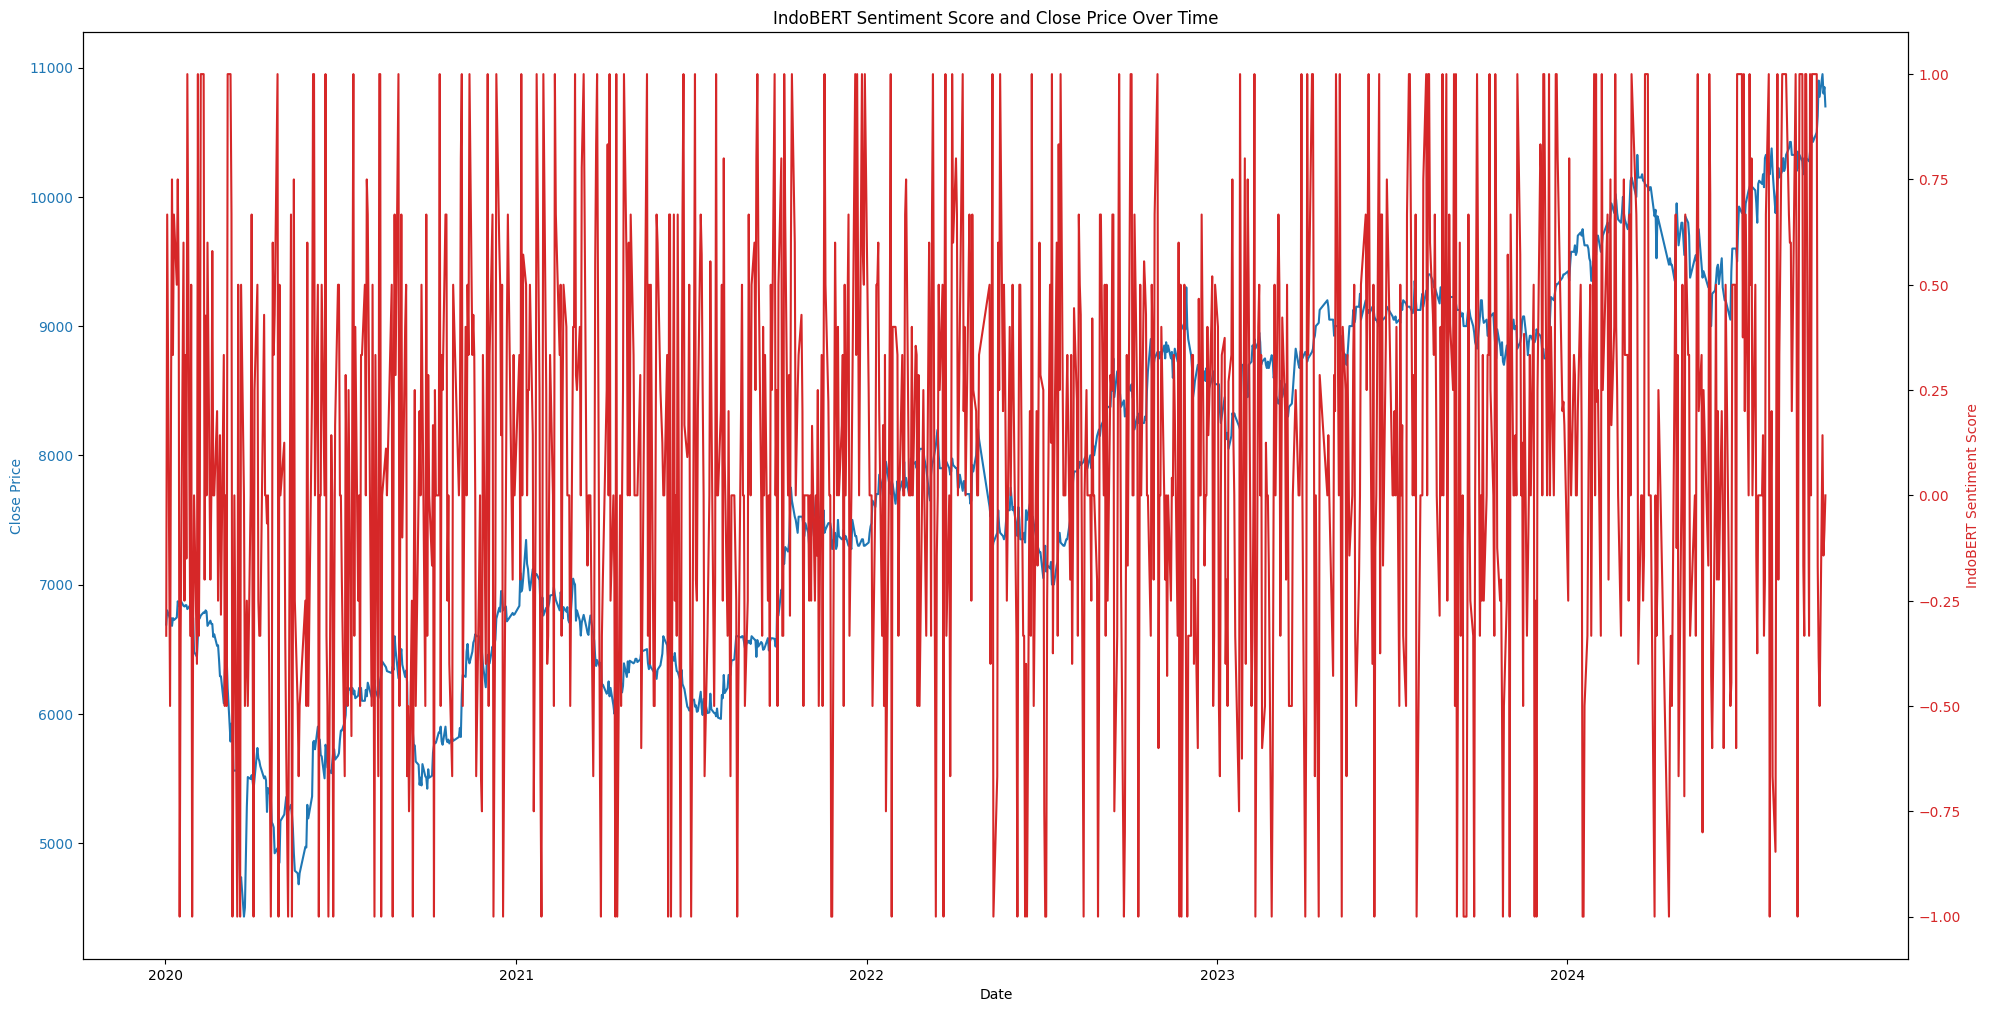

In [9]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(20, 10))  # Set the figure size

# Plot Close price
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(combined_df['Date'], combined_df['Close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot the IndoBERT Sentiment Score
ax2 = ax1.twinx()
ax2.set_ylabel('IndoBERT Sentiment Score', color='tab:red')
ax2.plot(combined_df['Date'], combined_df['IndoBERT Sentiment Score'], color='tab:red', label='IndoBERT Sentiment Score')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('IndoBERT Sentiment Score and Close Price Over Time')
plt.show()


In [10]:
combined_df.to_csv('../Data/Final Dataset/indoBERT_lexicon_7TIs.csv', index=False)